# Modeling listing prices

In this notebook, we will attempt to model listing prices based on the features we've scraped earlier in the 'webscraping' notebook. 

In [2]:
#Importing all the necessary libraries 

#visualisation
import pandas as pd
import numpy as np

#Data analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling - splitting the dataset, selecting model through cross validation, linear model and RF

#Processing
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

#Evaluating the model 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#Feature selection
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

#Model types 
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

#Metrics 
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

We will start by importing our CSV database into a Pandas dataframe. 

In [3]:
df = pd.read_csv('Dataframefinal_clean.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Localisation,Emplacement,name,date,Nombre de chambres,Prix par nuit,Nombre de voyageurs,...,Ascenseur_True,Climatisation_True,Piscine_True,Vue sur le lac_True,Vue sur la baie_True,Saison,Score,Score1,Score2,Logement codé
0,0,0,0,"Perledo, Lombarofa, Italie","Emplacement4,6",Chambre privée dans : logement ⸱ Chez Matteo,17 juin 2022 - 19 juin 2022,1.0,27.0,1.0,...,0,0,0,0,0,0.0,-0.037923,-0.281573,-0.721694,2.0
1,1,1,1,"Abbaofa Lariana, Lombarofa, Italie","Emplacement4,8",Logement entier : appartement en résidence ⸱ C...,24 juin 2022 - 26 juin 2022,1.0,90.0,4.0,...,0,0,0,1,0,0.0,0.355693,0.240040,-0.096574,4.0
2,2,2,2,"Tremezzo, Lombarofa, Italie","Emplacement4,6",Logement entier : logement ⸱ Chez Alex,17 juin 2022 - 19 juin 2022,1.0,50.0,2.0,...,0,0,0,0,0,0.0,0.326580,0.096383,-0.038575,5.0
3,3,3,3,"Moltrasio, Lombarofa, Italie","Emplacement4,7",Logement entier : appartement ⸱ Chez Riccardo,24 juin 2022 - 26 juin 2022,1.0,190.0,4.0,...,1,0,0,0,0,0.0,0.751613,0.599922,0.638247,4.0
4,4,4,4,"Vercana, Lombarofa, Italie","Emplacement4,7",Logement entier : appartement ⸱ Chez Roberto,10 juin 2022 - 12 juin 2022,1.0,85.0,4.0,...,0,0,0,1,0,0.0,0.074936,-0.252272,-0.610029,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1007,1007,1195,"Côme, Lombarofa, Italie",empty,Logement entier : appartement en résidence ⸱ C...,16 sept. 2022 - 18 sept. 2022,1.0,155.0,4.0,...,0,1,0,0,0,0.0,0.865991,0.680334,0.865991,4.0
1008,1008,1008,1196,"Côme, Lombarofa, Italie","Emplacement5,0",Logement entier : appartement ⸱ Chez Pia,30 sept. 2022 - 2 oct. 2022,3.0,354.0,6.0,...,0,1,0,0,0,0.0,0.865991,0.680334,0.865991,4.0
1009,1009,1009,1197,"Perledo, Lombarofa, Italie","Emplacement4,8",Logement entier : appartement en résidence ⸱ C...,30 sept. 2022 - 2 oct. 2022,1.0,205.0,3.0,...,0,0,1,1,0,0.0,-0.037923,-0.281573,-0.721694,4.0
1010,1010,1010,1198,"Faggeto Lario, Molina, Como, Italie","Emplacement5,0",Logement entier : logement ⸱ Chez Elisabetta,16 sept. 2022 - 18 sept. 2022,1.0,120.0,3.0,...,0,0,0,0,0,0.0,0.838768,0.653977,0.701537,5.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Localisation',
       'Emplacement', 'name', 'date', 'Nombre de chambres', 'Prix par nuit',
       'Nombre de voyageurs', 'Nombre de lits', 'Nombre de salles de bains',
       'Localisation2', 'Vue sur le jardin_True', 'Vue sur la vallée_True',
       'Vue sur la montagne_True', 'Baignoire_True', 'Sèche-cheveux_True',
       'Bidet_True', 'Eau chaude_True', 'Lave-linge_True',
       'Equipements de base_True', 'Cintres_True', 'Draps_True',
       'Oreillers_True', 'Fer à repasser_True', 'Armoire_True', 'TV_True',
       'Livres_True', 'Ventilateurs_True', 'Chauffage_True', 'Wifi_True',
       'Cuisine_True', 'Four_True', 'Vaisselle et couverts_True',
       'Jardin privé_True', 'Garage résidentiel_True', 'Parking gratuit_True',
       'Ascenseur_True', 'Climatisation_True', 'Piscine_True',
       'Vue sur le lac_True', 'Vue sur la baie_True', 'Saison', 'Score',
       'Score1', 'Score2', 'Logement codé'],
      dtype='object')

We have 48 columns: to model the listing prices, we use the variables that are useable, i.e., numerical variables/non-string variables. The explained variable is "Prix par nuit" and the explicative variables are the remainder of the columns of the dataframe df that are numerical variables (either binary variables through one-hot-encoding or classes). 

We create a sub-dataframe that we will use while modeling listing prices.

In [6]:
model = df.iloc[:,np.r_[7:12,13:48]]
model

,Nombre de chambres,Prix par nuit,Nombre de voyageurs,Nombre de lits,Nombre de salles de bains,Vue sur le jardin_True,Vue sur la vallée_True,Vue sur la montagne_True,Baignoire_True,Sèche-cheveux_True,...,Ascenseur_True,Climatisation_True,Piscine_True,Vue sur le lac_True,Vue sur la baie_True,Saison,Score,Score1,Score2,Logement codé
0,1.0,27.0,1.0,1.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0.0,-0.037923,-0.281573,-0.721694,2.0
1,1.0,90.0,4.0,4.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0.0,0.355693,0.240040,-0.096574,4.0
2,1.0,50.0,2.0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.326580,0.096383,-0.038575,5.0
3,1.0,190.0,4.0,2.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0.0,0.751613,0.599922,0.638247,4.0
4,1.0,85.0,4.0,2.0,1.0,0,1,1,0,0,...,0,0,0,1,0,0.0,0.074936,-0.252272,-0.610029,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1.0,155.0,4.0,2.0,1.0,0,0,0,1,1,...,0,1,0,0,0,0.0,0.865991,0.680334,0.865991,4.0
1008,3.0,354.0,6.0,3.0,3.0,0,0,0,0,1,...,0,1,0,0,0,0.0,0.865991,0.680334,0.865991,4.0
1009,1.0,205.0,3.0,1.0,1.0,0,1,1,0,1,...,0,0,1,1,0,0.0,-0.037923,-0.281573,-0.721694,4.0
1010,1.0,120.0,3.0,3.0,1.0,0,0,0,1,1,...,0,0,0,0,0,0.0,0.838768,0.653977,0.701537,5.0


## Feature selection

In this part, we are trying to select the features that predict the best our target, which is here the price per night.
To begin with, we are going to display the heatmap of all of our variables in our dataset : this will allow us to know 2 things
about our data :

- First, it will allow us to know whether there is a correlation between some of our variables that could be the features of our model. Indeed, it would be an useful information: if there is an high correlation between two variables, it would allow us to only keep one of the two variables because they would contain the same information.

- Then, the heatmap also has a useful information regarding our target variable. Indeed, to create our model, we should select the variables that have a quite high correlation with the target to have the model with the best prediction.

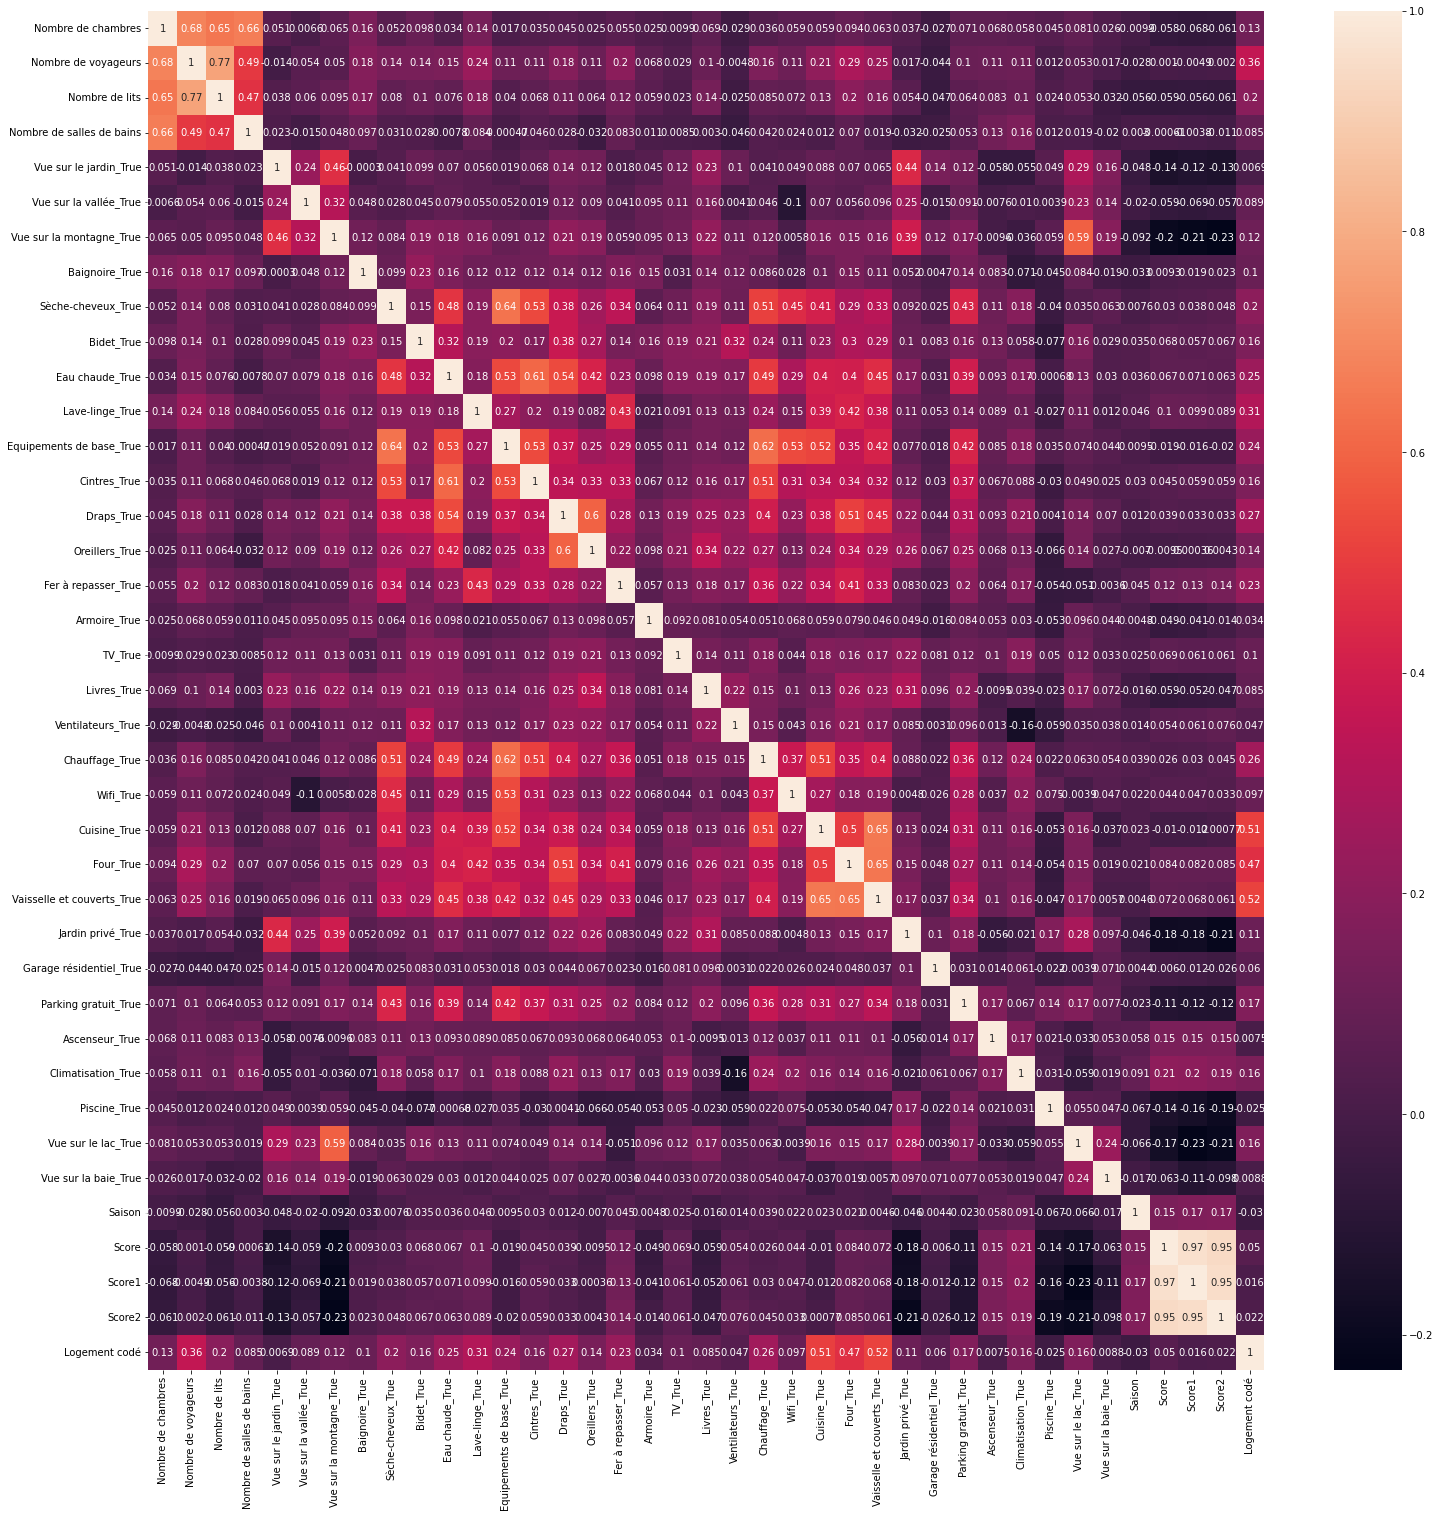

In [14]:
#To do that, we make an heatmap based on the columns 4 to 40 that represent all of the possible features in our model.
potential_features = df.iloc[:,np.r_[7,9:12,13:48]]
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(potential_features.corr(), annot=True, ax=ax);

According to this heatmap, we can deduce multiple things: 
First, the main variables that we would be using in our model will be the following : nombre de chambres, nombre de voyageurs, nombre de salles de bains but also Climatisation_True or Piscine_True and Vue sur le lac_True. However, the correlation of these variables with the target is quite low in comparison with usual correlations between features and target, which could let us think that the quality of prediction won't be that good.
Then, we can take a look at some of the correlations between the features. In this case too, it seems like the correlations are not really strong between the features, but we can still assume that the information contained in Four_True, Vaisselle_True et couverts_True and Cuisine_True is quite similar and only one could be used in our model (probably Four_True since it has the best correlation with the target). The same could be said about Nombre de lits et Nombre de voyageurs. 

We start by defining what are: 
- y, the explained variable
- X, the table containing all the explicative variables. 

In [7]:
y = model["Prix par nuit"]
X = model.iloc[:,np.r_[0,2:40]]

We start by spliting the dataset into a train and test set, in order to train our database to get the best predictions out of the data. We split our data such that:
- 80% training size
- 20% testing size

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=893717398)

In order to select our features, we will use the recursive feature elimination with cross validation with different types of regression (e.g., Linear Regression, XGBoost, Random Forest Regressor). 

We start by testing the linear regression. 

In [32]:
lm = LinearRegression() #linear model 
rfecv = RFECV(estimator= lm, step= 1, cv=10) #it treats each variable with a step of 1, slices the data into 10 folds. 

rfecv = rfecv.fit(X_train, y_train) #it does the rfecv based on all the variables starting from vue sur le jardin on prix par nuit

print('Optimal number of features :', rfecv.n_features_)
best_features = X_train.columns[rfecv.support_].tolist()
best_features 

Optimal number of features : 11


['Nombre de chambres',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Equipements de base_True',
 'Garage résidentiel_True',
 'Parking gratuit_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score',
 'Score1']

With such results, it appears that there are 11 optimal features with the linear regression estimator for the RFECV. This list of features will allow us to compute an estimation, as well as a metric, the R², that will judge the predictive qualities of the selected variables. However, as the recursive feature elimination with cross validation takes twice the score related to the location, we only keep the first score, i.e., Score. 

In [36]:
lm = LinearRegression()
feature_col_x_bis = ['Nombre de chambres',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Equipements de base_True',
 'Garage résidentiel_True',
 'Parking gratuit_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

from sklearn.preprocessing import FunctionTransformer

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(lm, Xbis, data_new, cv=10, scoring='r2').mean()
R2

0.35416343928180993

Then, we do the same process for the xgboost regression. 

In [39]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000) #xgboost
rfecv_xgb = RFECV(estimator= xg_reg, step= 1, cv=10) #it treats each variable with a step of 1, slices the data into 10 folds according to xgb regression

rfecv_xgb = rfecv_xgb.fit(X_train, y_train)

print('Optimal number of features :', rfecv_xgb.n_features_)
best_features = X_train.columns[rfecv_xgb.support_].tolist()
best_features 

Optimal number of features : 15


['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Fer à repasser_True',
 'Four_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score',
 'Score1',
 'Score2',
 'Logement codé']

In [44]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)
feature_col_x_bis = ['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Fer à repasser_True',
 'Four_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score',
 'Logement codé']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(xg_reg, Xbis, data_new, cv=10, scoring='r2').mean()
R2

0.41461746975548486

We proceed to do the same with the Random Forest Regressor. 

In [18]:
lr = RandomForestRegressor(n_estimators=100) #Random Forest
rfecv_lr = RFECV(estimator= lr, step= 1, cv=10) 

rfecv_lr = rfecv_lr.fit(X_train, y_train) 

print('Optimal number of features :', rfecv_lr.n_features_)
best_features = X_train.columns[rfecv_lr.support_].tolist()
best_features 

Optimal number of features : 33


['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Vue sur le jardin_True',
 'Vue sur la montagne_True',
 'Baignoire_True',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Eau chaude_True',
 'Lave-linge_True',
 'Cintres_True',
 'Draps_True',
 'Oreillers_True',
 'Fer à repasser_True',
 'Armoire_True',
 'TV_True',
 'Livres_True',
 'Ventilateurs_True',
 'Wifi_True',
 'Four_True',
 'Jardin privé_True',
 'Parking gratuit_True',
 'Ascenseur_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Vue sur la baie_True',
 'Saison',
 'Score',
 'Score1',
 'Score2',
 'Logement codé']

In [20]:
lr = RandomForestRegressor(n_estimators=1000)
feature_col_x_bis = ['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Vue sur le jardin_True',
 'Vue sur la montagne_True',
 'Baignoire_True',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Eau chaude_True',
 'Lave-linge_True',
 'Cintres_True',
 'Draps_True',
 'Oreillers_True',
 'Fer à repasser_True',
 'Armoire_True',
 'TV_True',
 'Livres_True',
 'Ventilateurs_True',
 'Wifi_True',
 'Four_True',
 'Jardin privé_True',
 'Parking gratuit_True',
 'Ascenseur_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Vue sur la baie_True',
 'Saison',
 'Score',
 'Logement codé']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(lr, Xbis, data_new, cv=10, scoring='r2').mean()
R2

C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

0.5798757713897348

According to the RFECV and the results we have for the R² metric, we assume that it is best to use the xgboost model 

With the following features: ['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Fer à repasser_True',
 'Four_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score',
 'Logement codé']
 
Although the Random Forest Regressor displays a better R², it uses almost all the variables, which artificially boosts our metric, which is not always good, since the R² automatically grows as we add variables. 

# Other ways of selecting the best model

We tried other methods that would give us the best variables in our model, i.e., the most relevant ones in our model. This includes using the Random Forest Classifier and analyzing the correlations that are included in the heatmap. 
There are other ways of finding the best model, as well as finding the most relevant variables to be included in the best-selected model, such as the principal-composant analysis (PCA), but we won't tackle these other alternatives. 

In [10]:
rf = RandomForestClassifier() #RF classifier 
rf.fit(X, y) #fits the data we have 
imp_var = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False) #computes the importance of each variable 
imp_var

Saison                        0.101242
Nombre de voyageurs           0.064728
Nombre de lits                0.058101
Score1                        0.057669
Score                         0.057496
Score2                        0.056670
Logement codé                 0.042456
Nombre de chambres            0.034958
TV_True                       0.029076
Bidet_True                    0.028881
Lave-linge_True               0.028697
Oreillers_True                0.026614
Fer à repasser_True           0.026036
Baignoire_True                0.023621
Climatisation_True            0.023429
Livres_True                   0.022003
Vue sur la montagne_True      0.020736
Ventilateurs_True             0.020714
Jardin privé_True             0.020698
Draps_True                    0.020413
Ascenseur_True                0.019349
Parking gratuit_True          0.019177
Vue sur le lac_True           0.019043
Four_True                     0.018659
Nombre de salles de bains     0.017819
Vaisselle et couverts_Tru

In [12]:
lm = LinearRegression()
feature_col_x_bis = ['Saison','Nombre de voyageurs', 'Nombre de lits', 'Score', 'Logement codé','Nombre de chambres']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(lm, Xbis, data_new, cv=10, scoring='r2').mean()
R2

0.26189324176606493

According to the correlation matrix, we can select the following variables: 
['Vue sur le jardin_True',
 'Fer à repasser_True',
 'Armoire_True',
 'TV_True',
 'Livres_True',
 'Wifi_True',
 'Cuisine_True',
 'Four_True',
 'Vaisselle et couverts_True',
 'Jardin privé_True',
 'Parking gratuit_True',
 'Ascenseur_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Vue sur la baie_True',
 'Saison','Logement codé', 'Score']

In [17]:
lm = LinearRegression()
feature_col_x_bis = ['Vue sur le jardin_True',
 'Fer à repasser_True',
 'Armoire_True',
 'TV_True',
 'Livres_True',
 'Wifi_True',
 'Cuisine_True',
 'Four_True',
 'Vaisselle et couverts_True',
 'Jardin privé_True',
 'Parking gratuit_True',
 'Ascenseur_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Vue sur la baie_True',
 'Saison','Logement codé', 'Score']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(lm, Xbis, data_new, cv=10, scoring='r2').mean()
R2

0.29523405424643856

With their R² being of a lesser value than the models with the variables we've selected with RFECV, we will only focus on XGBOOST with 13 variables.

With the model selected, we proceed to make predictions out of the model we've selected, which is the xgboost. 

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)
feature_col_x_bis = ['Nombre de chambres',
 'Nombre de voyageurs',
 'Nombre de lits',
 'Nombre de salles de bains',
 'Sèche-cheveux_True',
 'Bidet_True',
 'Fer à repasser_True',
 'Four_True',
 'Climatisation_True',
 'Piscine_True',
 'Vue sur le lac_True',
 'Score',
 'Logement codé']
Xbis = df[feature_col_x_bis]
feature_y = ['Prix par nuit']
y = df[feature_y]

#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

#Apply the transformation
data_new = logarithm_transfer.transform(y)

R2 = cross_val_score(xg_reg, Xbis, data_new, cv=10, scoring='r2').mean()
R2
y_pred = cross_val_predict(xg_reg, Xbis, data_new, cv=10)

In [24]:
y_pred #is in logarithm - need to transform in exp

array([3.706305 , 4.6374254, 4.3543363, ..., 4.637923 , 4.5617843,
       4.729356 ], dtype=float32)

In [26]:
y_pred_exp = np.exp(y_pred)

In [27]:
y_pred_exp

array([ 40.703133, 103.27811 ,  77.81516 , ..., 103.32948 ,  95.75418 ,
       113.2226  ], dtype=float32)

In [31]:
pred =  pd.DataFrame(y_pred_exp, columns=['y_pred'])
pred

,y_pred
0,40.703133
1,103.278107
2,77.815163
3,110.757286
4,85.582558
...,...
1007,140.968353
1008,259.559814
1009,103.329483
1010,95.754181


In [32]:
y_val = pd.DataFrame(y, columns=['y'])

In [38]:
pred['y_val'] = model["Prix par nuit"]

In [39]:
pred

,y_pred,y_val
0,40.703133,27.0
1,103.278107,90.0
2,77.815163,50.0
3,110.757286,190.0
4,85.582558,85.0
...,...,...
1007,140.968353,155.0
1008,259.559814,354.0
1009,103.329483,205.0
1010,95.754181,120.0


In [40]:
pred["Gap"] = pred["y_val"] - pred["y_pred"]

In [41]:
pred

,y_pred,y_val,Gap
0,40.703133,27.0,-13.703133
1,103.278107,90.0,-13.278107
2,77.815163,50.0,-27.815163
3,110.757286,190.0,79.242714
4,85.582558,85.0,-0.582558
...,...,...,...
1007,140.968353,155.0,14.031647
1008,259.559814,354.0,94.440186
1009,103.329483,205.0,101.670517
1010,95.754181,120.0,24.245819
